# Phase 2 - Machine Learning Assignment

**Name**: Suraj Suresh<br>
**Student ID**: s3916081<br>
**Group**: 107<br>
**Group Name**: The lone wolf

## Table of contents:

1. [**Introduction**](#1)<br>
> 1.1 [Phase 1 summary](#1.1)<br>
> 1.2 [Report Overview](#1.2)<br>
> 1.3 [Overview of Methodology](#1.3)<br>
>> 1.3.1 [Categorical column selection and encoding](#1.3.1)<br>
>> 1.3.2 [Scaling of numerical features](#1.3.2)<br>
>> 1.3.3 [Feature importances using RandomForestClassifier](#1.3.3)<br>
>> 1.3.4 [Splitting the dataset into train and test set](#1.3.4)<br>
>> 1.3.5 [KNN algorithm: preprocessing and hyperparameter tuning](#1.3.5)<br>
>> 1.3.6 [Naive Bayes algorithm: preprocessing and hyperparameter tuning](#1.3.6)<br>
>> 1.3.7 [Decision tree algorithm: preprocessing and hyperparameter tuning](#1.3.7)<br>
>> 1.3.8 [Finetuning the DT algorithm](#1.3.8)<br>
>> 1.3.9 [Comparison of KNN, NB and DT algorithms](#1.3.9)<br>

2. [**Predictive Modeling**](#2)<br>
> 2.1 [Feature Selection](#2.1)<br>
> 2.2 [Model fitting and tuning](#2.2)<br>
>> 2.2.1 [KNN algorithm](#2.2.1)<br>
>> 2.2.2 [NB algorithm](#2.2.2)<br>
>> 2.2.3 [DT algorithm](#2.2.3)<br>
>> 2.2.4 [Fine tuning the DT algorithm](#2.2.4)<br>
> 2.3 [Model Comparison](#2.3)<br>

3. [**Critique and Limitations**](#3)<br>

4. [**Summary and conclusions**](#4)<br>
> 4.1 [Project Summary](#4.1)<br>
> 4.2 [Summary of findings](#4.2)<br>
> 4.3 [Conclusion](#4.3)<br>

5. [**References**](#5)<br>

## 1. Introduction: <a id='1'></a>

This section contains the summary of the data cleaning processing in phase 1 of this assignment. It also contains an overview of the entire report and the methodologies used throughout.

#### 1.1 Phase 1 summary: <a id='1.1'></a>
The phase 1 of this project was an involved process of data cleaning and preparation, which would be required for the predictive tasks included in this phase of the project. We performed different tasks of data cleaning for the categorical and numerical features, the details of which are present in the paragraphs below.<br>

Null values were identified in the dataset and many cells were stored as '?'. These cells were replaced with NaN values to correctly identify them. Observations that had the target 'band_type' missing were removed from the dataset.<br>

Categorical columns had inconsistencies when it came to the number of unique sub-categories because of misspelling, casing and extra spacing in the values. Columns that had these errors were all converted to lower case and stripped of extra spaces. Categorical columns that had high class imbalances were removed as they presented no meaningful information to the dataset. The cells that had missing values were imputed with the mode of that column.<br>

Numerical columns had missing values which were imputed with their respective medians. Some numerical columns were stored as objects instead of integer or float data type as it contained commas (',') within them. These were removed and the datatype was set accordingly.<br>

We then visualized the categorical and numerical features to spot further inconsistencies. Categorical columns that had a high class imbalance were identified in these bar graphs and removed from the dataset. Numerical columns that had outliers were capped to their respective upper and lower limits, which were calculated using their 1st and 3rd quartiles and the inter-quartile range. Numerical columns that centered around just one value were also removed as they added no value to our analysis.<br>

We then did a bivariate analysis between the numerical features using a heatmap of the correlation matrix. This showed the associations between all pairs of numerical variables. These pairs were then visualized using a scatter plot.
Another bivariate analysis performed was the association between the target column 'band_type' and the numerical columns. These associations were visualized using a boxplot. To observe the association between the target and categorical columns, bar graphs were used.<br>

With this, we concluded the phase 1 of our project after drawing inferences from all the visualizations and analysis.<br>

#### 1.2 Report Overview:  <a id='1.2'></a>
In the phase 2 of the project, we will perform predictive modeling on the dataset for the target variable 'band_type'. Several steps of preprocessing are involved and some steps are unique for each of the machine learning algorithm used in this project. The objective is to identify the algorithm that best predicts the target variable 'band_type'.<br>

We will check the categorical columns and retain only those that add value to the learning of our models. Any columns that aren't so, will be removed from the set of features. The numerical columns will be retained as they are as they have been thoroughly analysed in the phase 1 of this project.<br>

Feature importances are drawn from the dataset using the 'randomforestclassifier' algorithm. We will first visualize the top 10 features that add value to our analysis. We will then split the features and target variables into training and testing set and stratify them to mantain the class balance in them.<br>

We will then build KNN, Naive Bayes and decision tree models using top 10, 20 and all features respectively. The performances of these models will then be visualized individually. Before the fitting of these models, the features are converted to numpy arrays as the library `sklearn` recognizes only arrays. For Naive Bayes algorithm, an additional step of power transformation is performed on the features. The details of these preprocessings will be mentioned in later sections in this report.<br>

We also perform grid search on all the algorithms to identify the best set of parameters for each model. For knn, the parameters are the number of neighbours and the distance metric (Euclidean (p=2) or Manhattan (p=1)). For Naive Bayes the variable smoothing is the parameter to be searched for. And for Decision trees, the parameters are maximum depth and minimum number of splits to be used in the trees.<br>

Once the performances of each algorithm and the right parameter set for them is obtained, we perform further fine tuning on decision trees algorithm by analyzing more values in the parameter space. <br>

We then compare the performances of all the best models obtained in each algorithm using classification reports and confusion matrices. The classification reports give us the final accuracies of the models and the confusion matrix help us look at the quality of classification of the classes individually.<br>

We finally recommend the model that best predicts the target variable `band_type`.<br>

#### 1.3 Overview of Methodology: <a id='1.3'></a>
This section details the methodologies pursuid for the different steps involved in preprocessing, model building and classification of the target variable 'band_type'.

##### 1.3.1 Categorical column selection and encoding: <a id='1.3.1'></a>
We check if a categorical column adds value as a feature, in the task of prediction. Categorical columns with too many sub-categories are removed as they add no fundamental value to our analysis. Also, columns such as IDs are removed for the same reason. We will retain only those categorical columns that could potentially add value to our prediction of the occurance of cylinder banding.<br>

**Encoding of categorical features**:<br>
Once the essential categorical columns are retained, we perform one-hot encoding on them using the `get_dummies` method available in the 'pandas' library. This creates a new binary column for every sub-category in all the categorical columns. Categorical columns with just two levels have only one encoded column and those with more than two sub-categories have an encoded column for all the sub-categories.<br>

##### 1.3.2 Scaling of numerical features: <a id='1.3.2'></a>
In this project, the `MinMaxScaler` method from the sklearn library has been used for scaling the numerical features between the range of 0 to 1. This is called as normalization and it is useful for our algorithms as they are distance based. Features with a high range in their distribution might result in warping the feature space and present a result that is not reflective of its actual placement. The formula for min-max scaling is as shown below:<br>

**value_i = (value_i - min_value)/(max_value - min_value)**

This calculation restricts the range between 0 and 1 and gives our algorithms a better indication of its location in the feature space.

##### 1.3.3 Feature importances using RandomForestClassifier: <a id='1.3.3'></a>
A `RandomForestClassifier` method is used from the sklearn library to obtain the feature importances of all the features in the dataset. We use 100 trees in the random forest classifier model and fit on the features and target to obtain a feature importance from this model.<br>
The top 10 features are visualized once their importances are obtained.<br>

##### 1.3.4 Splitting the dataset into train and test set: <a id='1.3.4'></a>
The dataset is split into the training and testing data using the `train_test_split` method available in the sklearn library. A stratified splitting is done on the dataset to maintain the class balance of the target feature.

##### 1.3.5 KNN algorithm: Preprocessing and hyperparameter tuning: <a id='1.3.5'></a>
**Preprocessing:**<br>
There are no further preprocessing steps involved for using the KNN algorithm. We require a numpy array of the features and the target variable band_type, which we obtain from the train-test split earlier.

**Hyperparameter tuning:**<br>
This is done using the `GridsearchCV` method available in the sklearn library. We identify the best parameter values from a range of value provided. The parameters for the KNN algorithm are the number of neighbours (n_neighbors) and the distance metric that must be used - Manhattan distance (p=1) or Euclidean distance (p=2).<br>

The performance of the knn algorithm with the best 10, 20 and all features is recorded and visualized after the training.<br>

##### 1.3.6 NB algorithm: Preprocessing and hyperparameter tuning: <a id='1.3.6'></a>
**Preprocessing:**
This algorithm relies on the distribution of the observations in the feature space. And having a more Gaussian like distribution enables the algorithm to function better at the task of prediction. So, we use `PowerTransformer` function in the sklearn library to transform the training features before fitting the model.

**Hyperparameter tuning:**<br>
Variable smoothing is the parameter that has to be tuned for a naive bayes model. We are able to do this using `RandomizedsearchCV` method in the sklearn algorithm. This is different from gridsearchCV where fixed set of values and their performances are computed. Randomizedsearch CV picks random values and computes their performance as the possible set of values is infinite.<br>

##### 1.3.7 DT algorithm: Preprocessing and hyperparameter tuning: <a id='1.3.7'></a>
**Preprocessing:**
Similar to the KNN algorithm, the Decision tree algorithm just requires that the data is stored as numpy arrays instead of a pandas dataframe. This has been obtained in the train-test splitting step.<br>

**Hyperparameter tuning:**<br>
The hyperparameters that will be considered for tuning in this project are the 'max_depth' and the 'min_samples_split'. Max_depth signifies the maximum depth that the tree can traverse to before finalizing its model. And min_samples_split mandates a minimum number of samples to be present in the terminal nodes of the decision tree. Both of these are pruning methods used to avoid the overfitting of the data. Similar to KNN, a grid search cross-validation is used to identify the right parameters for our decision tree model.<br>

##### 1.3.8 Fine-tuning the DT algorithm: <a id='1.3.8'></a>
Once the best model is obtained from the initial fitting of the decision tree model, we search through a larger range of values for the two parameters mentioned earlier - the max_depth and min_samples_split. We then record the performance score of the best model obtained.<br>

##### 1.3.9 Comparison of the KNN, NB and DT algorithms: <a id='1.3.9'></a>
**Scoring Metric**:
The accuracy score of classification is used as the scoring metric for measuring the performances of the models. A classification report then gives us the F1-score which is a metric obtained from the precision and recall of our predictions. These are the metrics with which the hyperparameter tuning and model comparison is done. A confusion matrix for the finalized models is then seen to understand the quality of predictions of our models.

###### Importation of necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [2]:
tmp = pd.read_csv('Phase1_Group107.csv')
tmp.head()

,cylinder_number,customer,job_number,grain_screened,proof_on_ctd_ink,paper_type,ink_type,solvent_type,type_on_cylinder,press_type,...,varnish_pct,press_speed,ink_pct,solvent_pct,esa_voltage,wax,hardener,roller_durometer,anode_space_ratio,band_type
0,x126,tvguide,25503,YES,YES,uncoated,uncoated,LINE,yes,Motter94,...,13.1,1700.0,50.5,36.4,0.000,2.5,1.0,34.0,105.00,band
1,x266,tvguide,25503,YES,YES,uncoated,uncoated,LINE,yes,Motter94,...,6.6,1900.0,54.9,38.5,0.000,2.5,0.7,34.0,105.00,noband
2,b7,modmat,47201,YES,YES,uncoated,coated,LINE,yes,WoodHoe70,...,6.5,1850.0,53.8,39.8,0.000,2.8,0.9,40.0,103.87,noband
3,t133,massey,39039,YES,YES,uncoated,uncoated,LINE,yes,WoodHoe70,...,5.6,1467.0,55.6,38.8,0.000,2.5,1.3,40.0,108.06,noband
4,j34,kmart,37351,NO,YES,uncoated,coated,LINE,yes,WoodHoe70,...,0.0,2100.0,57.5,42.5,4.375,2.3,0.6,35.0,106.67,noband


In [3]:
df = tmp.copy()

In [4]:
# all categorical columns
cat = ['cylinder_number','customer','job_number','grain_screened','proof_on_ctd_ink',
       'paper_type','ink_type','solvent_type','type_on_cylinder','press_type','press',
       'unit_number','cylinder_size','paper_mill_location','plating_tank','band_type']

# all numeric columns
num = [i for i in df.columns if i not in cat]

In [5]:
df.shape[1] == len(num+cat)

True

## 2. Predictive modeling <a id='2'></a>

#### Cleaning and transforming the categorical variables

In [6]:
df.loc[:,cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cylinder_number      539 non-null    object 
 1   customer             539 non-null    object 
 2   job_number           539 non-null    int64  
 3   grain_screened       539 non-null    object 
 4   proof_on_ctd_ink     539 non-null    object 
 5   paper_type           539 non-null    object 
 6   ink_type             539 non-null    object 
 7   solvent_type         539 non-null    object 
 8   type_on_cylinder     539 non-null    object 
 9   press_type           539 non-null    object 
 10  press                539 non-null    int64  
 11  unit_number          539 non-null    float64
 12  cylinder_size        539 non-null    object 
 13  paper_mill_location  539 non-null    object 
 14  plating_tank         539 non-null    int64  
 15  band_type            539 non-null    obj

We can see that job_number, press, unit_number and plating_tank are not objects. These will have to be converted to object datatype to be considered for our machine learning preprocessing and fitting methods. We will do this by converting the values in these columns as strings from integers or float values.

In [7]:
for c in ['job_number','press','unit_number','plating_tank']:
    df[c] = df[c].astype(str)

In [8]:
df.loc[:,cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cylinder_number      539 non-null    object
 1   customer             539 non-null    object
 2   job_number           539 non-null    object
 3   grain_screened       539 non-null    object
 4   proof_on_ctd_ink     539 non-null    object
 5   paper_type           539 non-null    object
 6   ink_type             539 non-null    object
 7   solvent_type         539 non-null    object
 8   type_on_cylinder     539 non-null    object
 9   press_type           539 non-null    object
 10  press                539 non-null    object
 11  unit_number          539 non-null    object
 12  cylinder_size        539 non-null    object
 13  paper_mill_location  539 non-null    object
 14  plating_tank         539 non-null    object
 15  band_type            539 non-null    object
dtypes: objec

Now they are all set as object datatype. We can also see that there are no null values.<br>
Now we will check the number of sub-categories for each categorical variable and decide if its retention is sensible.

In [9]:
df.loc[:,cat].nunique()

cylinder_number        429
customer                71
job_number             261
grain_screened           2
proof_on_ctd_ink         2
paper_type               3
ink_type                 3
solvent_type             3
type_on_cylinder         2
press_type               4
press                    8
unit_number              7
cylinder_size            3
paper_mill_location      5
plating_tank             2
band_type                2
dtype: int64

The variables cylinder_number, customer and job_number have too many sub-categories as we can see above. These many sub-categories add little to no value in our prediction.<br>
Also, cylinder banding is a consequence of production process. Variables such as customer ID, cylinder ID, job ID, have no say in the prediction of such target variables. So we will drop these columns.

In [10]:
df.shape

(539, 32)

In [11]:
df.drop(labels=['cylinder_number','customer','job_number'], axis=1, inplace=True)
df.shape

(539, 29)

In [12]:
[cat.remove(c) for c in ['cylinder_number','customer','job_number']]
df.loc[:,cat].nunique()

grain_screened         2
proof_on_ctd_ink       2
paper_type             3
ink_type               3
solvent_type           3
type_on_cylinder       2
press_type             4
press                  8
unit_number            7
cylinder_size          3
paper_mill_location    5
plating_tank           2
band_type              2
dtype: int64

### Encoding the categorical features

The dataset will be split as the independent variables and the target variable. Before modelling it is necessary to encode the variables into numerical features.

###### Encoding the target variable:
After segregating the target from the dataset, we call it as "y". The rest of the features are saved in the variable "df".

In [13]:
df = df.iloc[:,:-1]
y = tmp.iloc[:,-1]
y.value_counts()

noband    312
band      227
Name: band_type, dtype: int64

In [14]:
y = y.replace({'noband':0, 'band':1})
y.value_counts()

0    312
1    227
Name: band_type, dtype: int64

###### Encoding the categorical features:

If a categorical variable has q sub-categories, then q columns are created to represent each sub-category. However, if a categorical column has only two levels, we retain only one encoded column for the variable and drop the other.

In [15]:
cat.remove('band_type')
cat

['grain_screened',
 'proof_on_ctd_ink',
 'paper_type',
 'ink_type',
 'solvent_type',
 'type_on_cylinder',
 'press_type',
 'press',
 'unit_number',
 'cylinder_size',
 'paper_mill_location',
 'plating_tank']

In [16]:
for c in cat:
    if df[c].nunique()==2:
        df[c] = pd.get_dummies(df[c], drop_first=True)
        
# encoding the rest of the features:
df = pd.get_dummies(df)

In [17]:
df.columns

Index(['grain_screened', 'proof_on_ctd_ink', 'type_on_cylinder',
       'plating_tank', 'proof_cut', 'viscosity', 'caliper', 'ink_temperature',
       'humidity', 'roughness', 'blade_pressure', 'varnish_pct', 'press_speed',
       'ink_pct', 'solvent_pct', 'esa_voltage', 'wax', 'hardener',
       'roller_durometer', 'anode_space_ratio', 'paper_type_coated',
       'paper_type_super', 'paper_type_uncoated', 'ink_type_coated',
       'ink_type_cover', 'ink_type_uncoated', 'solvent_type_LINE',
       'solvent_type_NAPTHA', 'solvent_type_XYLOL', 'press_type_Albert70',
       'press_type_Motter70', 'press_type_Motter94', 'press_type_WoodHoe70',
       'press_802', 'press_813', 'press_815', 'press_816', 'press_821',
       'press_824', 'press_827', 'press_828', 'unit_number_1.0',
       'unit_number_10.0', 'unit_number_2.0', 'unit_number_5.0',
       'unit_number_6.0', 'unit_number_7.0', 'unit_number_9.0',
       'cylinder_size_catalog', 'cylinder_size_spiegel',
       'cylinder_size_tabloid

In [18]:
df.head()

,grain_screened,proof_on_ctd_ink,type_on_cylinder,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humidity,roughness,...,unit_number_7.0,unit_number_9.0,cylinder_size_catalog,cylinder_size_spiegel,cylinder_size_tabloid,paper_mill_location_canadian,paper_mill_location_mideuropean,paper_mill_location_northus,paper_mill_location_scandanavian,paper_mill_location_southus
0,1,1,1,1,55.0,46.0,0.200,17.0,78.0,0.75000,...,0,0,0,0,1,0,0,1,0,0
1,1,1,1,0,55.0,46.0,0.300,15.0,80.0,0.75000,...,0,0,0,0,1,0,0,1,0,0
2,1,1,1,0,62.0,40.0,0.433,16.0,80.0,0.75000,...,0,1,1,0,0,0,0,1,0,0
3,1,1,1,0,52.0,40.0,0.300,16.0,75.0,0.34375,...,0,1,1,0,0,0,0,1,0,0
4,0,1,1,0,50.0,46.0,0.300,17.0,80.0,0.75000,...,0,0,0,0,1,0,0,1,0,0


In [19]:
df.shape

(539, 56)

### Scaling the numerical features

Now we scale the numerical features in our dataset. We save it in a separate variable "x" to retain the column names in "df". "x" will be a numpy array and not a dataframe. This will be fed to the model for training.

In [20]:
x = MinMaxScaler().fit_transform(df)
x

array([[1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [21]:
x.shape

(539, 56)

### Feature Selection using importances <a id='2.1'></a>

In [22]:
num_features = 10

# model
rfi = RandomForestClassifier(n_estimators=100, random_state=0)
rfi.fit(x, y)
n_indices = np.argsort(rfi.feature_importances_)[::-1][0:num_features]

#best featuers
top10 = df.columns[n_indices].values
top10

array(['ink_pct', 'viscosity', 'press_speed', 'varnish_pct',
       'ink_temperature', 'solvent_pct', 'humidity', 'roller_durometer',
       'anode_space_ratio', 'hardener'], dtype=object)

In [23]:
[i for i in top10 if i in cat]

[]

In [24]:
[i for i in top10 if i in num]

['ink_pct',
 'viscosity',
 'press_speed',
 'varnish_pct',
 'ink_temperature',
 'solvent_pct',
 'humidity',
 'roller_durometer',
 'anode_space_ratio',
 'hardener']

In [25]:
f_importances = rfi.feature_importances_[n_indices]
f_importances

array([0.06867474, 0.06181308, 0.06056113, 0.05291125, 0.05241125,
       0.0504898 , 0.04933586, 0.04619749, 0.04043595, 0.03854715])

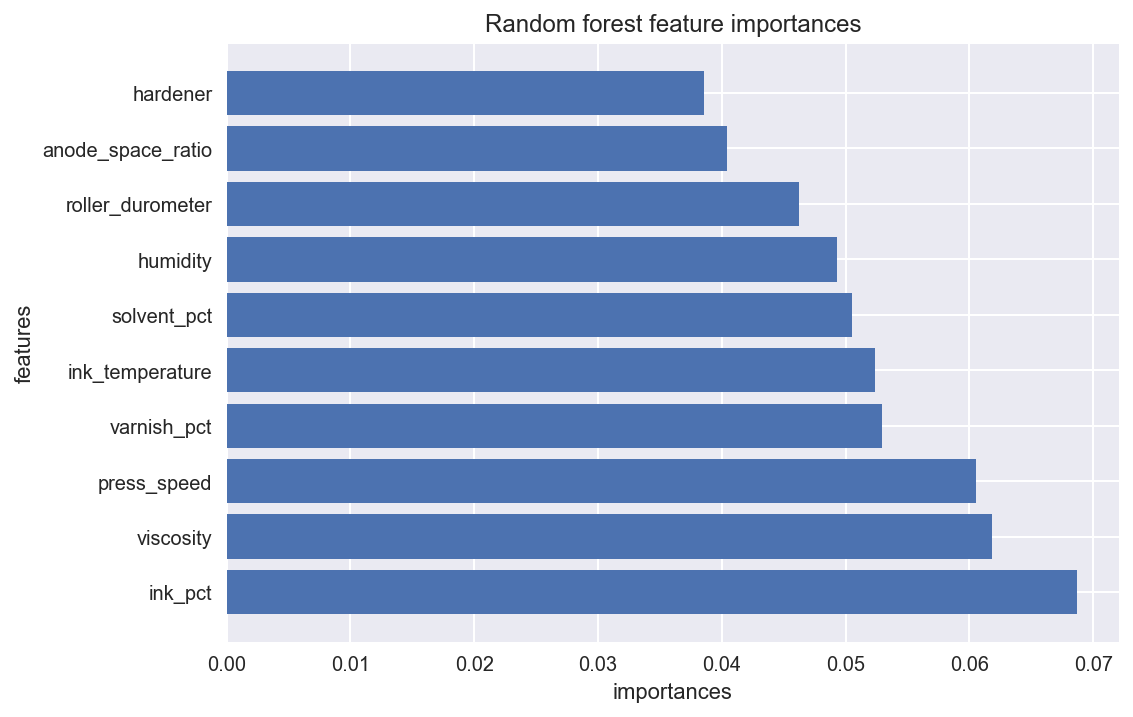

In [26]:
plt.barh(top10, f_importances)
plt.title('Random forest feature importances')
plt.xlabel('importances')
plt.ylabel('features')
plt.show()

### Train test split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=0, stratify=y)

In [28]:
xtrain.shape, ytrain.shape

((404, 56), (404,))

In [29]:
xtest.shape, ytest.shape

((135, 56), (135,))

### Model Fitting and Tuning: <a id='2.2'></a>

In [30]:
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [31]:
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # define attributes of an instance
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.f_indices_ = None
        # important methods for functioning:
        from sklearn.ensemble import RandomForestClassifier
        import numpy as np
        
    # fit the importance estimator:
    def fit(self, x, y):
        rfi = RandomForestClassifier(n_estimators=100)
        rfi.fit(x,y)
        self.f_indices_ = np.argsort(rfi.feature_importances_)[::-1][0:self.n_features_]
        return self
    
    def transform(self, x, y=None):
        return np.array([x[:,i] for i in self.f_indices_]).T

### KNN Algorithm: <a id='2.2.1'></a>

In [32]:
knn_params = {'n_neighbors':list(range(1,20)),
             'p':[1,2]}

In [33]:
num_features = [10, 20, x.shape[1]]
knn_best_model = {}

for i in num_features:
    r = RFIFeatureSelector(n_features_=i)
    r.fit(xtrain, ytrain)
    xtrain_cur_features = r.transform(xtrain)
    
    knn = KNeighborsClassifier()

    grid = GridSearchCV(knn, knn_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
    grid.fit(xtrain_cur_features, ytrain)
    knn_best_model[i] = {'parameters':grid.best_params_,
                    'score':grid.best_score_,
                    'model':grid.best_estimator_}

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Fitting 5 folds for each of 38 candidates, totalling 190 fits
Fitting 5 folds for each of 38 candidates, totalling 190 fits


In the fitting done above, we can see that 5 folds are created for each of 38 candidates, which totals to 190 fits. This means, for each model with a number of best features (10, 20 or 56), we have 19 values of number of neighbours to try (n=1 to n=20). And for each number of neighbour, we have 2 distances to try (euclidean (p=2) and manhattan (p=1)). <br>Hence, the total number of fits per number of feature considered = <br>
5 (cross val.) * 19 (num. neighbours) * 2 (p=1 or 2) = 190.

In [34]:
knn_best_model

{10: {'parameters': {'n_neighbors': 9, 'p': 1},
  'score': 0.7160553953311204,
  'model': KNeighborsClassifier(n_neighbors=9, p=1)},
 20: {'parameters': {'n_neighbors': 19, 'p': 1},
  'score': 0.7799341568264678,
  'model': KNeighborsClassifier(n_neighbors=19, p=1)},
 56: {'parameters': {'n_neighbors': 16, 'p': 1},
  'score': 0.8147398922566251,
  'model': KNeighborsClassifier(n_neighbors=16, p=1)}}

We can see that the best model is the model is the one that considered all the 56 features available and had a n value of 16. Which means it considered number of neighbours to be 16. And manhattan distance (p=1) outperformed the euclidean distance in every case. For the 10 feature model and 20 feature model, 6 neighbours and 7 neighbours performed best respectively. The performances of the models and their respective scores will be visualized below.

### KNN model performances

##### Top 10 features model performances:

In [35]:
r = RFIFeatureSelector(n_features_=10)
r.fit(xtrain, ytrain)
xtrain_10 = r.transform(xtrain)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
grid.fit(xtrain_10, ytrain)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]},
             scoring='roc_auc', verbose=1)

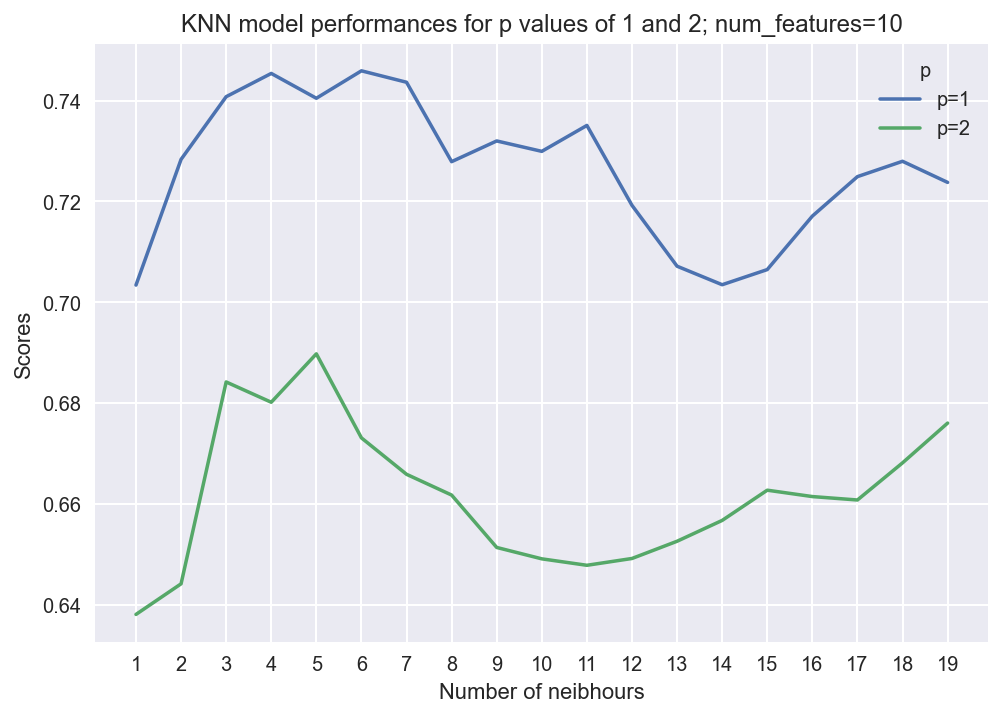

In [36]:
g = grid.cv_results_
p_1 = [(g['params'][i]['n_neighbors'], g['mean_test_score'][i]) for i in range(len(g['params'])) if g['params'][i]['p']==1]
p_2 = [(g['params'][i]['n_neighbors'], g['mean_test_score'][i]) for i in range(len(g['params'])) if g['params'][i]['p']==2]

x1,y1 = [i[0] for i in p_1], [i[1] for i in p_1]
x2, y2 = [i[0] for i in p_2], [i[1] for i in p_2]

plt.plot(x1, y1, label='p=1')
plt.plot(x2, y2, label='p=2')
plt.xticks(range(1,20))
plt.legend(title = 'p')
plt.title('KNN model performances for p values of 1 and 2; num_features=10')
plt.xlabel('Number of neibhours')
plt.ylabel('Scores')
plt.show()

We can see that the manhattan distance (p=1) outperforms the euclidean distance (p=2) when it comes to knn classification. The accuracies vary throughout the plot and changes with the number of neighbours considered. However, for 10 feature models, we can see that for 6 neighbours considered and for manhattan distance (p=1), the model performs best with an accuray score of approximately 74.5%

##### Top 20 features model performances:

In [37]:
r = RFIFeatureSelector(n_features_=20)
r.fit(xtrain, ytrain)
xtrain_20 = r.transform(xtrain)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
grid.fit(xtrain_20, ytrain)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]},
             scoring='roc_auc', verbose=1)

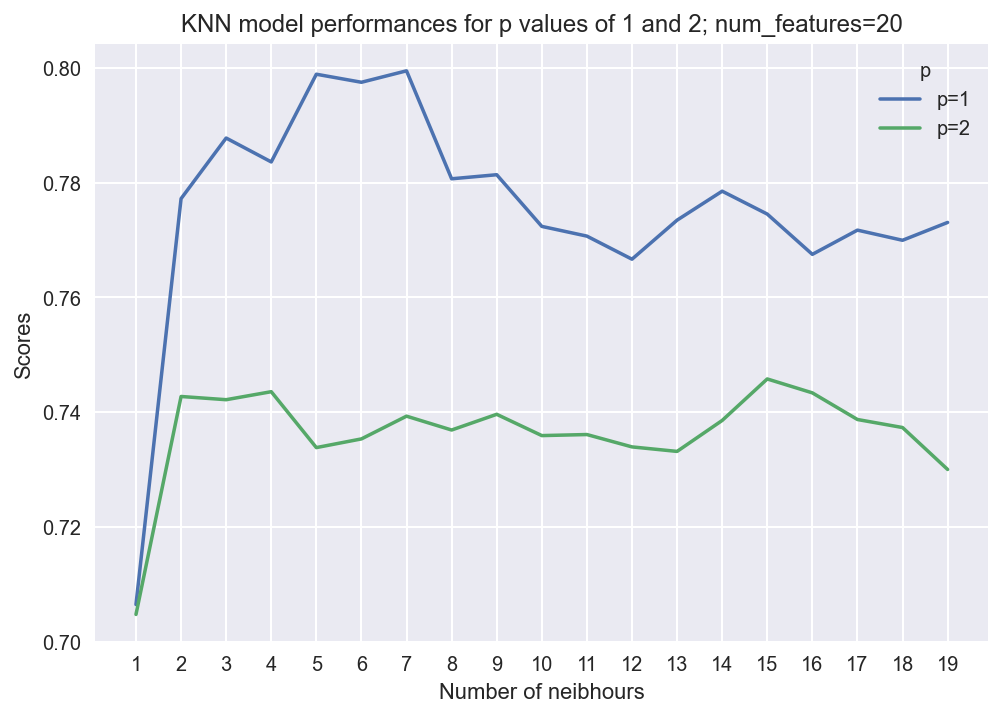

In [38]:
g = grid.cv_results_
p_1 = [(g['params'][i]['n_neighbors'], g['mean_test_score'][i]) for i in range(len(g['params'])) if g['params'][i]['p']==1]
p_2 = [(g['params'][i]['n_neighbors'], g['mean_test_score'][i]) for i in range(len(g['params'])) if g['params'][i]['p']==2]

x1,y1 = [i[0] for i in p_1], [i[1] for i in p_1]
x2, y2 = [i[0] for i in p_2], [i[1] for i in p_2]

plt.plot(x1, y1, label='p=1')
plt.plot(x2, y2, label='p=2')
plt.xticks(range(1,20))
plt.legend(title = 'p')
plt.title('KNN model performances for p values of 1 and 2; num_features=20')
plt.xlabel('Number of neibhours')
plt.ylabel('Scores')
plt.show()

We can see that the manhattan distance (p=1) outperforms the euclidean distance (p=2) when it comes to knn classification. The accuracies vary throughout the plot and changes with the number of neighbours considered. However, for 20 feature models, we can see that for 7 neighbours considered and for manhattan distance (p=1), the model performs best with an accuray score of approximately 80%

##### All features model performances:

In [39]:
r = RFIFeatureSelector(n_features_=x.shape[1])
r.fit(xtrain, ytrain)
xtrain_10 = r.transform(xtrain)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
grid.fit(xtrain_10, ytrain)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-2,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]},
             scoring='roc_auc', verbose=1)

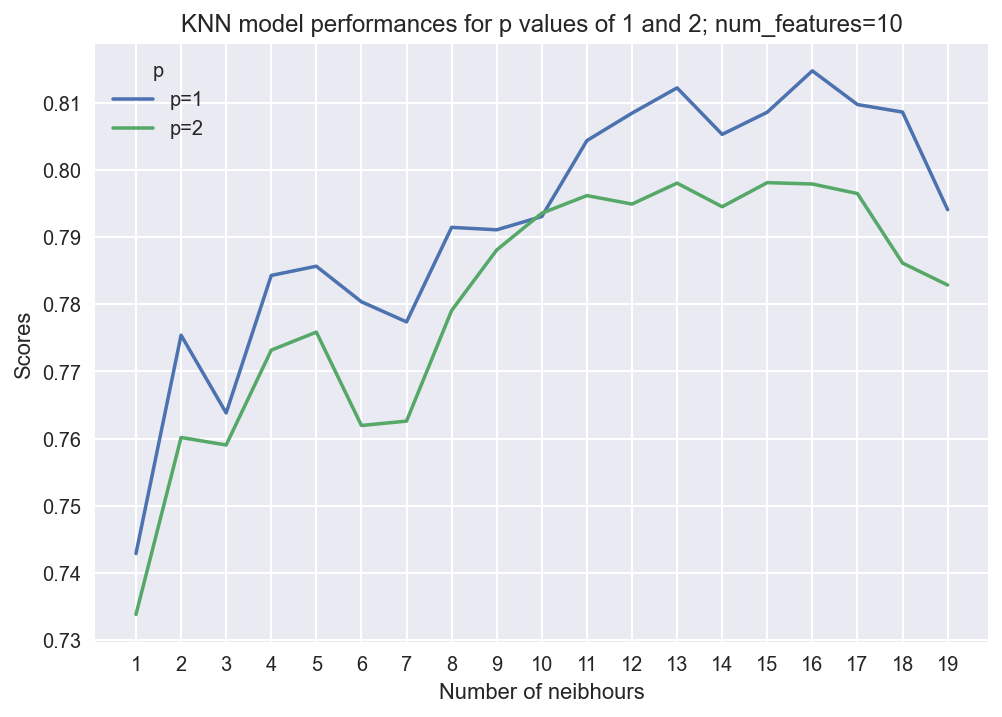

In [40]:
g = grid.cv_results_
p_1 = [(g['params'][i]['n_neighbors'], g['mean_test_score'][i]) for i in range(len(g['params'])) if g['params'][i]['p']==1]
p_2 = [(g['params'][i]['n_neighbors'], g['mean_test_score'][i]) for i in range(len(g['params'])) if g['params'][i]['p']==2]

x1,y1 = [i[0] for i in p_1], [i[1] for i in p_1]
x2, y2 = [i[0] for i in p_2], [i[1] for i in p_2]

plt.plot(x1, y1, label='p=1')
plt.plot(x2, y2, label='p=2')
plt.xticks(range(1,20))
plt.legend(title = 'p')
plt.title('KNN model performances for p values of 1 and 2; num_features=10')
plt.xlabel('Number of neibhours')
plt.ylabel('Scores')
plt.show()

We can see that the manhattan distance (p=1) outperforms the euclidean distance (p=2) when it comes to knn classification. The accuracies vary throughout the plot and changes with the number of neighbours considered. However, for 56 feature models, we can see that for 16 neighbours considered and for manhattan distance (p=1), the model performs best with an accurayc score of approximately 81.5%

### Naive Bayes Algorithm: <a id ='2.2.2'></a>

In [41]:
x_transformed = PowerTransformer().fit_transform(xtrain)
x_transformed.shape

(404, 56)

In [42]:
params_nb = {'var_smoothing':np.logspace(1,-3,num=200)}
n_iter_search = 20

In [43]:
num_features = [10, 20, x.shape[1]]
nb_best_model = {}

for i in num_features:
    r = RFIFeatureSelector(n_features_=i)
    r.fit(xtrain, ytrain)
    xtrain_cur_features = r.transform(x_transformed)
    
    nb = GaussianNB()

    grid = RandomizedSearchCV(nb, params_nb, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1, 
                        n_iter = n_iter_search, random_state=0)
    grid.fit(xtrain_cur_features, ytrain)
    nb_best_model[i] = {'params':grid.best_params_,
                    'score':grid.best_score_,
                    'model':grid.best_estimator_}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [44]:
nb_best_model

{10: {'params': {'var_smoothing': 0.03072112998861756},
  'score': 0.7127496326930401,
  'model': GaussianNB(var_smoothing=0.03072112998861756)},
 20: {'params': {'var_smoothing': 0.003827494478516311},
  'score': 0.7431354410404309,
  'model': GaussianNB(var_smoothing=0.003827494478516311)},
 56: {'params': {'var_smoothing': 0.3255088599835058},
  'score': 0.7428688033955487,
  'model': GaussianNB(var_smoothing=0.3255088599835058)}}

### NB Model performances:

##### 10 feature models:

In [45]:
r = RFIFeatureSelector(n_features_=10)
r.fit(xtrain, ytrain)
xtrain_cur_features = r.transform(x_transformed)

nb = GaussianNB()

grid = RandomizedSearchCV(nb, params_nb, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1, 
                    n_iter = n_iter_search, random_state=0)
grid.fit(xtrain_cur_features, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=GaussianNB(), n_iter=20, n_jobs=-2,
                   param_distributions={'var_smoothing': array([1.00000000e+01, 9.54771611e+00, 9.11588830e+00, 8.70359136e+00,
       8.30994195e+00, 7.93409667e+00, 7.57525026e+00, 7.23263390e+00,
       6.90551352e+00, 6.59318827e+00, 6.29498899e+00, 6.01027678e+00,
       5.738...
       2.89942285e-03, 2.76828663e-03, 2.64308149e-03, 2.52353917e-03,
       2.40940356e-03, 2.30043012e-03, 2.19638537e-03, 2.09704640e-03,
       2.00220037e-03, 1.91164408e-03, 1.82518349e-03, 1.74263339e-03,
       1.66381689e-03, 1.58856513e-03, 1.51671689e-03, 1.44811823e-03,
       1.38262217e-03, 1.32008840e-03, 1.26038293e-03, 1.20337784e-03,
       1.14895100e-03, 1.09698580e-03, 1.04737090e-03, 1.00000000e-03])},
                   random_state=0, scoring='roc_auc', verbose=1)

In [46]:
grid.best_params_, grid.best_score_

({'var_smoothing': 0.01162322468679853}, 0.7010556674103497)

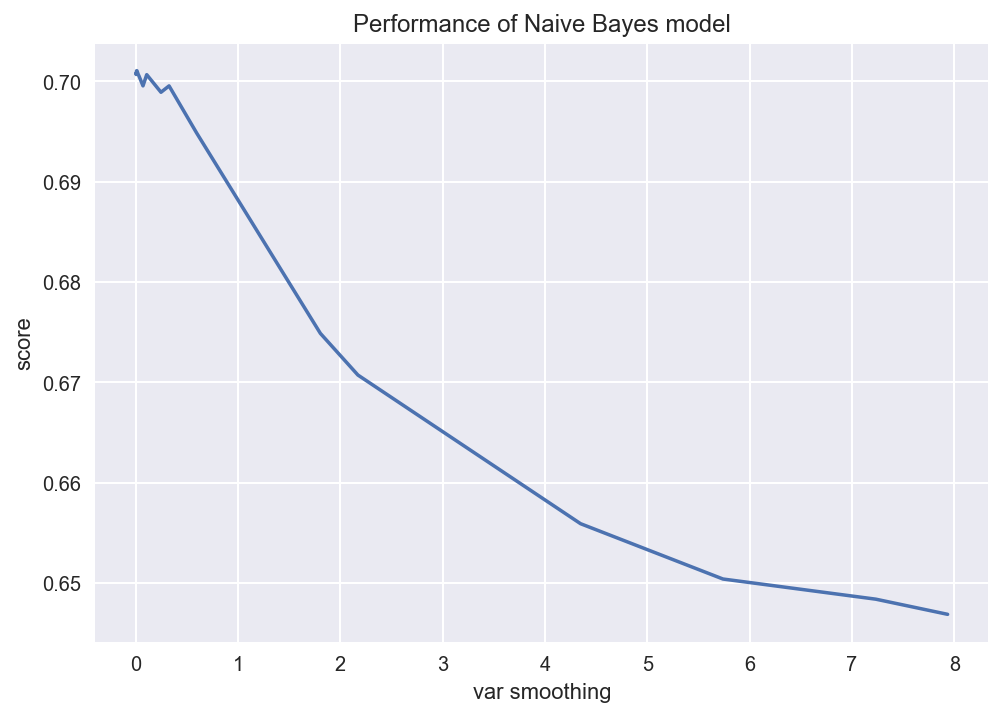

In [47]:
g = grid.cv_results_

a = list(g['param_var_smoothing'])
b = list(g['mean_test_score'])

l = list(zip(a,b))
l = sorted(l, key= lambda x: x[0])
a = [i[0] for i in l]
b = [i[1] for i in l]

plt.plot(a,b)
plt.title('Performance of Naive Bayes model')
#plt.xticks(list(range(0,11)))
plt.xlabel('var smoothing')
plt.ylabel('score')
plt.show()

###### 20 feature models:

In [48]:
r = RFIFeatureSelector(n_features_=20)
r.fit(xtrain, ytrain)
xtrain_cur_features = r.transform(x_transformed)

nb = GaussianNB()

grid = RandomizedSearchCV(nb, params_nb, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1, 
                    n_iter = n_iter_search, random_state=0)
grid.fit(xtrain_cur_features, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=GaussianNB(), n_iter=20, n_jobs=-2,
                   param_distributions={'var_smoothing': array([1.00000000e+01, 9.54771611e+00, 9.11588830e+00, 8.70359136e+00,
       8.30994195e+00, 7.93409667e+00, 7.57525026e+00, 7.23263390e+00,
       6.90551352e+00, 6.59318827e+00, 6.29498899e+00, 6.01027678e+00,
       5.738...
       2.89942285e-03, 2.76828663e-03, 2.64308149e-03, 2.52353917e-03,
       2.40940356e-03, 2.30043012e-03, 2.19638537e-03, 2.09704640e-03,
       2.00220037e-03, 1.91164408e-03, 1.82518349e-03, 1.74263339e-03,
       1.66381689e-03, 1.58856513e-03, 1.51671689e-03, 1.44811823e-03,
       1.38262217e-03, 1.32008840e-03, 1.26038293e-03, 1.20337784e-03,
       1.14895100e-03, 1.09698580e-03, 1.04737090e-03, 1.00000000e-03])},
                   random_state=0, scoring='roc_auc', verbose=1)

In [49]:
grid.best_params_, grid.best_score_

({'var_smoothing': 0.003827494478516311}, 0.7559558143331337)

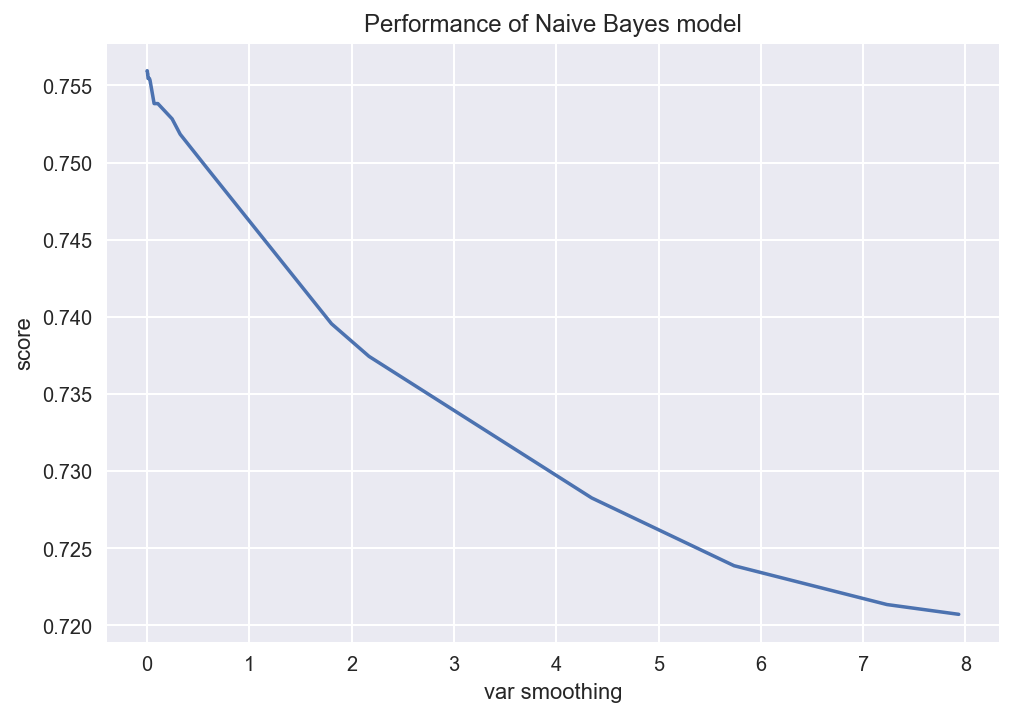

In [50]:
g = grid.cv_results_

a = list(g['param_var_smoothing'])
b = list(g['mean_test_score'])

l = list(zip(a,b))
l = sorted(l, key= lambda x: x[0])
a = [i[0] for i in l]
b = [i[1] for i in l]

plt.plot(a,b)
plt.title('Performance of Naive Bayes model')
#plt.xticks(list(range(0,11)))
plt.xlabel('var smoothing')
plt.ylabel('score')
plt.show()

###### All feature models:

In [51]:
r = RFIFeatureSelector(n_features_=x.shape[1])
r.fit(xtrain, ytrain)
xtrain_cur_features = r.transform(x_transformed)

nb = GaussianNB()

grid = RandomizedSearchCV(nb, params_nb, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1, 
                    n_iter = n_iter_search, random_state=0)
grid.fit(xtrain_cur_features, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=GaussianNB(), n_iter=20, n_jobs=-2,
                   param_distributions={'var_smoothing': array([1.00000000e+01, 9.54771611e+00, 9.11588830e+00, 8.70359136e+00,
       8.30994195e+00, 7.93409667e+00, 7.57525026e+00, 7.23263390e+00,
       6.90551352e+00, 6.59318827e+00, 6.29498899e+00, 6.01027678e+00,
       5.738...
       2.89942285e-03, 2.76828663e-03, 2.64308149e-03, 2.52353917e-03,
       2.40940356e-03, 2.30043012e-03, 2.19638537e-03, 2.09704640e-03,
       2.00220037e-03, 1.91164408e-03, 1.82518349e-03, 1.74263339e-03,
       1.66381689e-03, 1.58856513e-03, 1.51671689e-03, 1.44811823e-03,
       1.38262217e-03, 1.32008840e-03, 1.26038293e-03, 1.20337784e-03,
       1.14895100e-03, 1.09698580e-03, 1.04737090e-03, 1.00000000e-03])},
                   random_state=0, scoring='roc_auc', verbose=1)

In [52]:
grid.best_params_, grid.best_score_

({'var_smoothing': 0.3255088599835058}, 0.7428688033955487)

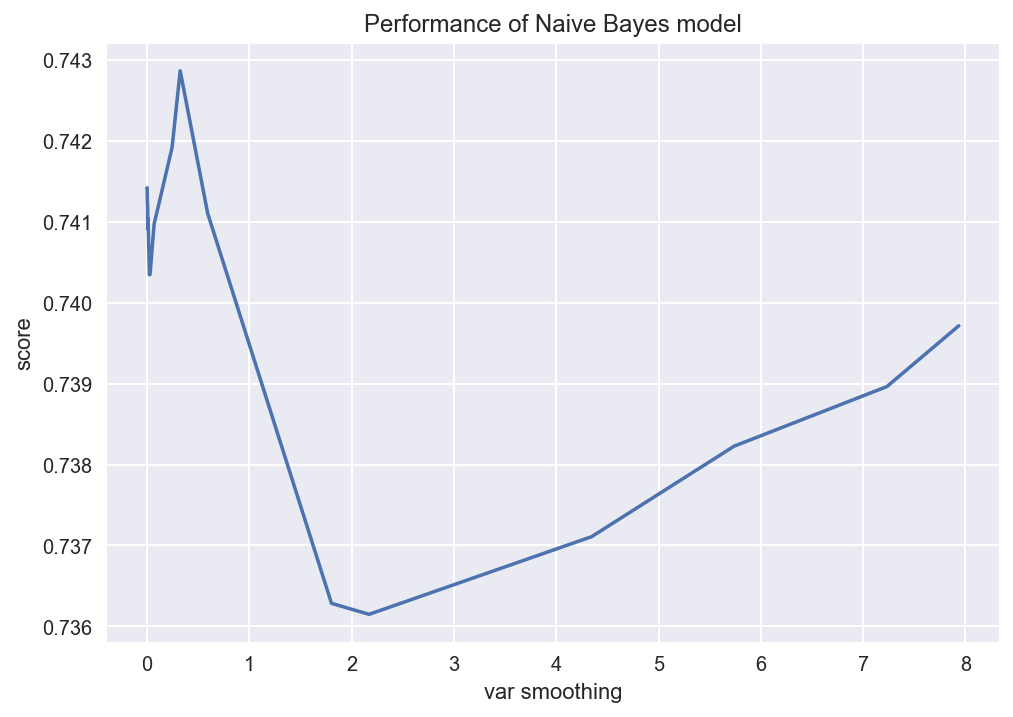

In [53]:
g = grid.cv_results_

a = list(g['param_var_smoothing'])
b = list(g['mean_test_score'])

l = list(zip(a,b))
l = sorted(l, key= lambda x: x[0])
a = [i[0] for i in l]
b = [i[1] for i in l]

plt.plot(a,b)
plt.title('Performance of Naive Bayes model')
#plt.xticks(list(range(0,11)))
plt.xlabel('var smoothing')
plt.ylabel('score')
plt.show()

### Decision tree algorithm: <a id='2.2.3'></a>

In [54]:
dt_params = {'max_depth':[3,4,5],
            'min_samples_split':[2,5]}

In [55]:
num_features = [10, 20, x.shape[1]]
dt_best_model = {}

for i in num_features:
    r = RFIFeatureSelector(n_features_=i)
    r.fit(xtrain, ytrain)
    xtrain_cur_features = r.transform(xtrain)
    
    dt = DecisionTreeClassifier(criterion='gini', random_state=0)

    grid = GridSearchCV(dt, dt_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
    grid.fit(xtrain_cur_features, ytrain)
    dt_best_model[i] = {'parameters':grid.best_params_,
                    'score':grid.best_score_,
                    'model':grid.best_estimator_}

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [56]:
dt_best_model

{10: {'parameters': {'max_depth': 4, 'min_samples_split': 5},
  'score': 0.7057626380802089,
  'model': DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=0)},
 20: {'parameters': {'max_depth': 4, 'min_samples_split': 2},
  'score': 0.7090017413070686,
  'model': DecisionTreeClassifier(max_depth=4, random_state=0)},
 56: {'parameters': {'max_depth': 3, 'min_samples_split': 2},
  'score': 0.7211854492028079,
  'model': DecisionTreeClassifier(max_depth=3, random_state=0)}}

### DT Model performances: 

###### 10 feature models:

In [57]:
r = RFIFeatureSelector(n_features_=10)
r.fit(xtrain, ytrain)
xtrain_10 = r.transform(xtrain)

dt = DecisionTreeClassifier(criterion='gini', random_state=0)
grid = GridSearchCV(dt, dt_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
grid.fit(xtrain_10, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-2,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 5]},
             scoring='roc_auc', verbose=1)

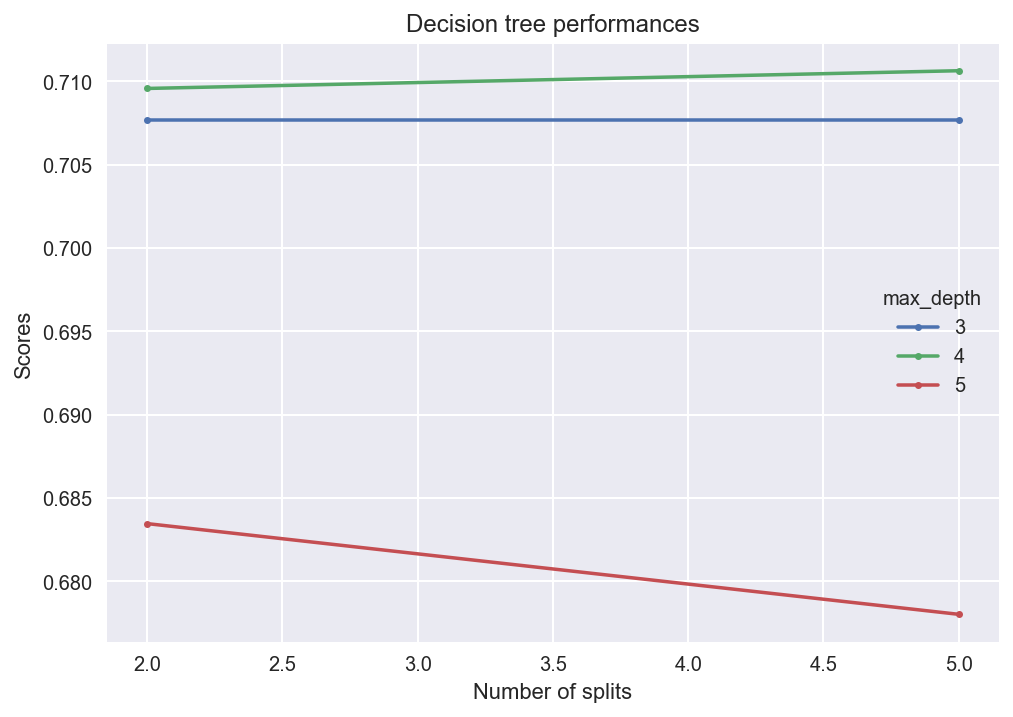

In [58]:
g = grid.cv_results_
y3 = list(g['mean_test_score'])[:2]
y4 = list(g['mean_test_score'])[2:4]
y5 = list(g['mean_test_score'])[4:]

plt.plot([2,5], y3, marker='.', label='3')
plt.plot([2,5], y4, marker='.', label='4')
plt.plot([2,5], y5, marker='.', label='5')
plt.legend(title='max_depth')
plt.title('Decision tree performances')
plt.xlabel('Number of splits')
plt.ylabel('Scores')
plt.show()

###### 20 feature models:

In [59]:
r = RFIFeatureSelector(n_features_=20)
r.fit(xtrain, ytrain)
xtrain_20 = r.transform(xtrain)

dt = DecisionTreeClassifier(criterion='gini', random_state=0)
grid = GridSearchCV(dt, dt_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
grid.fit(xtrain_20, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-2,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 5]},
             scoring='roc_auc', verbose=1)

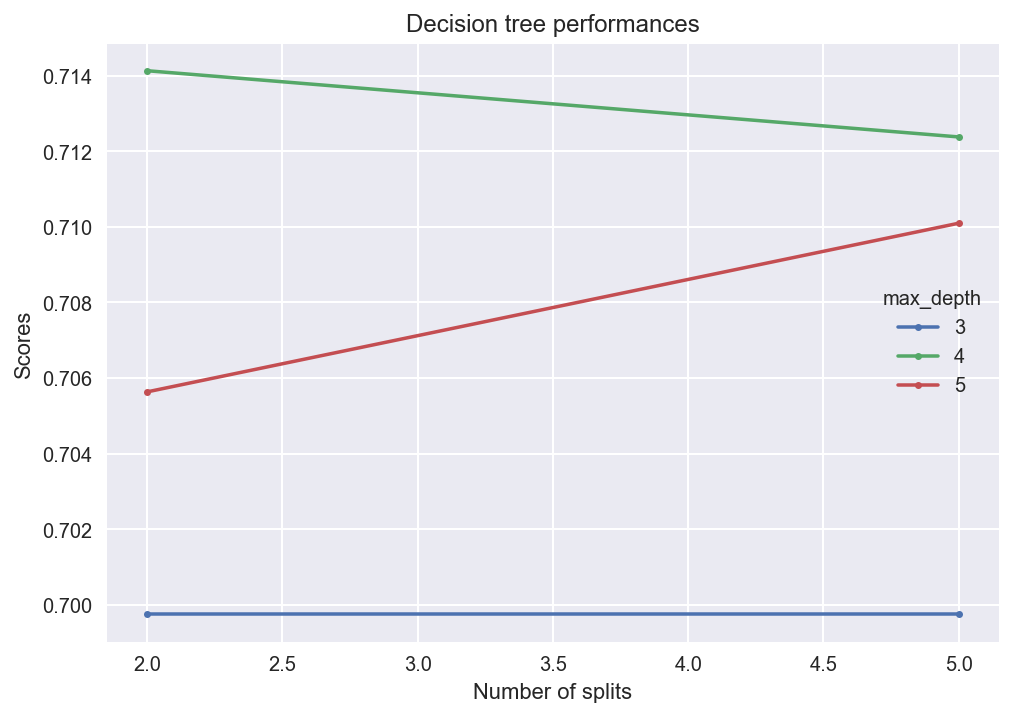

In [60]:
g = grid.cv_results_
y3 = list(g['mean_test_score'])[:2]
y4 = list(g['mean_test_score'])[2:4]
y5 = list(g['mean_test_score'])[4:]

plt.plot([2,5], y3, marker='.', label='3')
plt.plot([2,5], y4, marker='.', label='4')
plt.plot([2,5], y5, marker='.', label='5')
plt.legend(title='max_depth')
plt.title('Decision tree performances')
plt.xlabel('Number of splits')
plt.ylabel('Scores')
plt.show()

###### All feature models:

In [61]:
r = RFIFeatureSelector(n_features_=x.shape[1])
r.fit(xtrain, ytrain)
xtrain_all = r.transform(xtrain)

dt = DecisionTreeClassifier(criterion='gini', random_state=0)
grid = GridSearchCV(dt, dt_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
grid.fit(xtrain_all, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-2,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 5]},
             scoring='roc_auc', verbose=1)

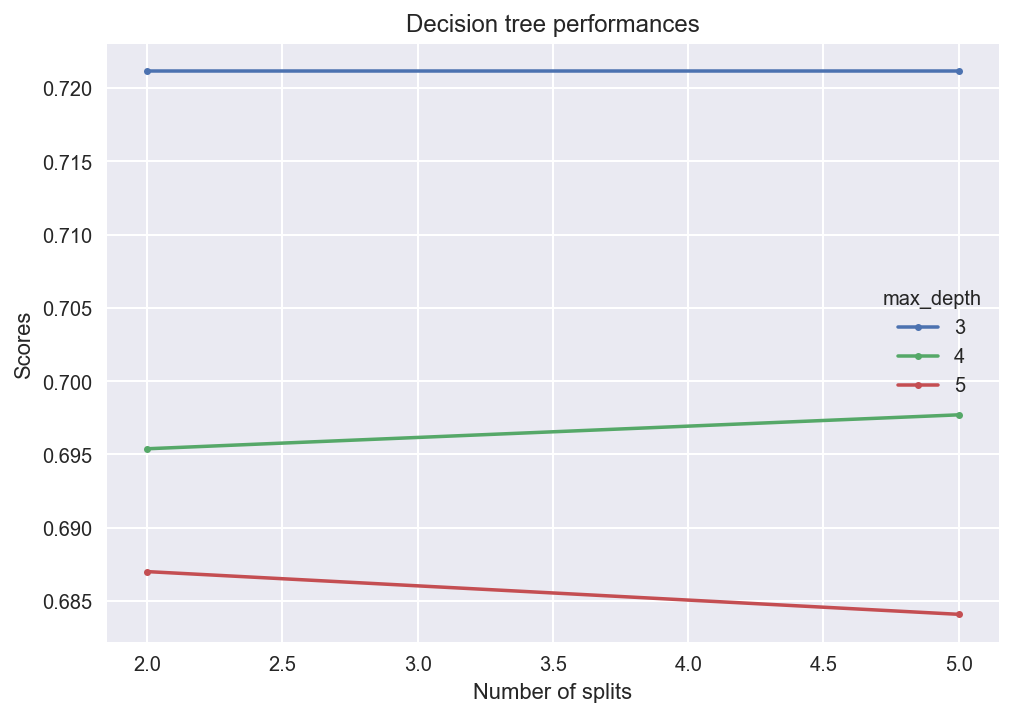

In [62]:
g = grid.cv_results_
y3 = list(g['mean_test_score'])[:2]
y4 = list(g['mean_test_score'])[2:4]
y5 = list(g['mean_test_score'])[4:]

plt.plot([2,5], y3, marker='.', label='3')
plt.plot([2,5], y4, marker='.', label='4')
plt.plot([2,5], y5, marker='.', label='5')
plt.legend(title='max_depth')
plt.title('Decision tree performances')
plt.xlabel('Number of splits')
plt.ylabel('Scores')
plt.show()

### Further fine tuning of DT model: <a id='2.2.4'></a>

We will be considering only 10 features for this exercise.

In [63]:
dt_params = {'max_depth':[5,10,15],
            'min_samples_split':[5,10,15,20,25,30]}

In [64]:
r = RFIFeatureSelector(n_features_=10)
r.fit(xtrain, ytrain)
xtrain_10 = r.transform(xtrain)

dt = DecisionTreeClassifier(criterion='gini', random_state=0)
grid = GridSearchCV(dt, dt_params, cv=cv_method, refit=True, n_jobs=-2, scoring='roc_auc', verbose=1)
grid.fit(xtrain_10, ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-2,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20, 25, 30]},
             scoring='roc_auc', verbose=1)

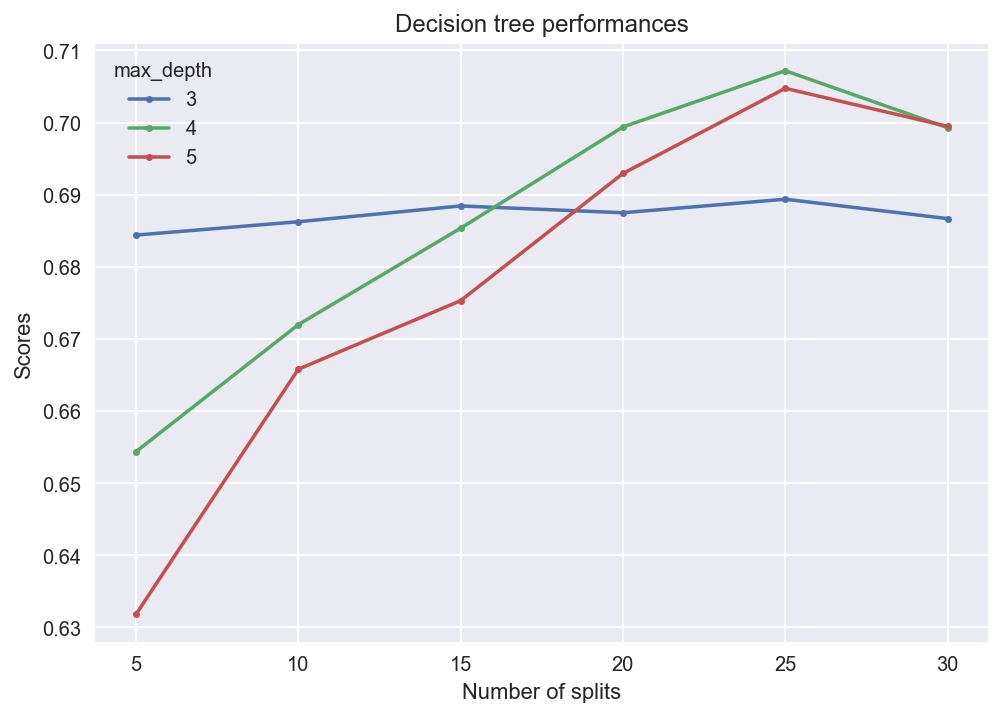

In [65]:
g = grid.cv_results_
y3 = list(g['mean_test_score'])[:6]
y4 = list(g['mean_test_score'])[6:12]
y5 = list(g['mean_test_score'])[12:]

plt.plot([5,10,15,20,25,30], y3, marker='.', label='3')
plt.plot([5,10,15,20,25,30], y4, marker='.', label='4')
plt.plot([5,10,15,20,25,30], y5, marker='.', label='5')
plt.legend(title='max_depth')
plt.title('Decision tree performances')
plt.xlabel('Number of splits')
plt.ylabel('Scores')
plt.show()

### Comparison of KNN, NB and DT algorithms <a id='2.3'></a>

Best models from all the tried knn, NB and DT algorithm models will be used for comparison in this section.

In [66]:
knn_best_model

{10: {'parameters': {'n_neighbors': 9, 'p': 1},
  'score': 0.7160553953311204,
  'model': KNeighborsClassifier(n_neighbors=9, p=1)},
 20: {'parameters': {'n_neighbors': 19, 'p': 1},
  'score': 0.7799341568264678,
  'model': KNeighborsClassifier(n_neighbors=19, p=1)},
 56: {'parameters': {'n_neighbors': 16, 'p': 1},
  'score': 0.8147398922566251,
  'model': KNeighborsClassifier(n_neighbors=16, p=1)}}

In [67]:
cv_method_ttest = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [68]:
knn_scores = [v['score'] for k,v in knn_best_model.items()]
knn_best = [(k, v['model']) for k,v in knn_best_model.items() if v['score']==max(knn_scores)][0]
knn_best

(56, KNeighborsClassifier(n_neighbors=16, p=1))

In [69]:
knn_model = knn_best[1]

xtest_cur_knn = xtest.copy()
if not knn_best[0]==x.shape[1]:
    r = RFIFeatureSelector(n_features_=knn_best[0])
    r.fit(xtrain, ytrain)
    xtest_cur_knn = r.transform(xtest)

knn_cv_results = cross_val_score(estimator=knn_model, X=xtest_cur_knn, y=ytest, cv=cv_method_ttest, n_jobs=-2, 
                                 scoring='roc_auc')
knn_cv_results.mean()

0.7869940476190477

From the 10 fold cross-validation, we can see the performance of the best KNN algorithm on the training data above.

In [70]:
nb_best_model

{10: {'params': {'var_smoothing': 0.03072112998861756},
  'score': 0.7127496326930401,
  'model': GaussianNB(var_smoothing=0.03072112998861756)},
 20: {'params': {'var_smoothing': 0.003827494478516311},
  'score': 0.7431354410404309,
  'model': GaussianNB(var_smoothing=0.003827494478516311)},
 56: {'params': {'var_smoothing': 0.3255088599835058},
  'score': 0.7428688033955487,
  'model': GaussianNB(var_smoothing=0.3255088599835058)}}

In [71]:
nb_scores = [v['score'] for k,v in nb_best_model.items()]
nb_best = [(k, v['model']) for k,v in nb_best_model.items() if v['score']==max(nb_scores)][0]
nb_best

(20, GaussianNB(var_smoothing=0.003827494478516311))

In [72]:
nb_model = nb_best[1]

xtest_cur_nb = xtest.copy()
if not nb_best[0]==x.shape[1]:
    r = RFIFeatureSelector(n_features_=nb_best[0])
    r.fit(xtrain, ytrain)
    xtest_cur_nb = r.transform(xtest)

xtest_transformed = PowerTransformer().fit_transform(xtest_cur_nb)
nb_cv_results = cross_val_score(estimator=nb_model, X=xtest_transformed, y=ytest, cv=cv_method_ttest,
                               n_jobs=-2, scoring='roc_auc')
nb_cv_results.mean()

0.7004761904761905

From the 10 fold cross-validation, we can see the performance of the best NB algorithm on the training data above.

In [73]:
dt_best_model

{10: {'parameters': {'max_depth': 4, 'min_samples_split': 5},
  'score': 0.7057626380802089,
  'model': DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=0)},
 20: {'parameters': {'max_depth': 4, 'min_samples_split': 2},
  'score': 0.7090017413070686,
  'model': DecisionTreeClassifier(max_depth=4, random_state=0)},
 56: {'parameters': {'max_depth': 3, 'min_samples_split': 2},
  'score': 0.7211854492028079,
  'model': DecisionTreeClassifier(max_depth=3, random_state=0)}}

In [74]:
dt_scores = [v['score'] for k,v in dt_best_model.items()]
dt_best = [(k,v['model']) for k,v in dt_best_model.items() if v['score']==max(dt_scores)][0]
dt_best

(56, DecisionTreeClassifier(max_depth=3, random_state=0))

In [75]:
dt_model = dt_best[1]

xtest_cur_dt = xtest.copy()
if dt_best[0]!=x.shape[1]:
    r = RFIFeatureSelector(n_features_=dt_best[0])
    r.fit(xtrain, ytrain)
    xtest_cur_dt = r.transform(xtest)

dt_cv_results = cross_val_score(estimator=dt_model, X=xtest_cur_dt, y=ytest, cv=cv_method_ttest,
                               n_jobs=-2, scoring='roc_auc')
dt_cv_results.mean()

0.6921130952380953

From the 10 fold cross-validation, we can see the performance of the best DT algorithm on the training data above.

#### Ttest comparison between the three model performances

In [76]:
print(stats.ttest_rel(knn_cv_results, nb_cv_results))
print(stats.ttest_rel(knn_cv_results, dt_cv_results))
print(stats.ttest_rel(dt_cv_results, nb_cv_results))

Ttest_relResult(statistic=1.8768714328793632, pvalue=0.09327078199891313)
Ttest_relResult(statistic=1.159297629551341, pvalue=0.27616694762995514)
Ttest_relResult(statistic=-0.12513048630051557, pvalue=0.9031707036037034)


We can see that the performances of the KNN, DT and NB algorithms are not significantly dissimilar to each other. Thus we cannot statistically pinpoint a single algorithm that would work best for our dataset.

##### The classification reports of the three models:

In [77]:
knn_pred = knn_model.predict(xtest_cur_knn)
nb_pred = nb_model.predict(xtest_transformed)
dt_pred = dt_model.predict(xtest_cur_dt)

In [78]:
print("\nClassification report for K-Nearest Neighbor") 
print(classification_report(ytest, knn_pred))
print("\nClassification report for Naive Bayes") 
print(classification_report(ytest, nb_pred))
print("\nClassification report for Decision Tree") 
print(classification_report(ytest, dt_pred))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.49      0.46      0.47        78
           1       0.31      0.33      0.32        57

    accuracy                           0.41       135
   macro avg       0.40      0.40      0.40       135
weighted avg       0.41      0.41      0.41       135


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        78
           1       0.66      0.51      0.57        57

    accuracy                           0.68       135
   macro avg       0.68      0.66      0.66       135
weighted avg       0.68      0.68      0.67       135


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.57      0.67      0.61        78
           1       0.40      0.30      0.34        57

    accuracy                           0.51       135
  

From the classification reports of the KNN, NB and DT algorithms on the test data, we can see that the performances have certainly dropped from that of the training data. This is to be expected. Yet, we still don't have a single algorithm that clearly outperforms the others. The confusion matrices of the three algorithms can be found below.

In [79]:
print("\nConfusion matrix for K-Nearest Neighbor") 
print(confusion_matrix(ytest, knn_pred))
print("\nConfusion matrix for Naive Bayes") 
print(confusion_matrix(ytest, nb_pred))
print("\nConfusion matrix for Decision Tree") 
print(confusion_matrix(ytest, dt_pred))


Confusion matrix for K-Nearest Neighbor
[[36 42]
 [38 19]]

Confusion matrix for Naive Bayes
[[63 15]
 [28 29]]

Confusion matrix for Decision Tree
[[52 26]
 [40 17]]


From the confusion matrices above, we can see that the classification hasn't been performed ideally. None of the models present a prediction that is superior to the other.

### Critique and Limitations: <a id='3'></a>

After the thorough research on this dataset and the steps we have done so far, we haven't yet identified a model that outperforms the other algorithms and also presents a test score that is similar. This could mean that the preprocessing and hyperparameter tuning processes have to be reviewed and newer ways to improve the prediction accuracy must be tested.<br>

The KNN algorithm, presented a somewhat agreeable training score but failed to present the same in the test data. This could indicate the presence of some overfitting in the dataset. We could also try the euclidean distances rather than manhattan distance as it produced a score more in line with the test score of the knn model.<br>

The Naive Bayes algorithm worked on Randomized search CV, and also failed to produce a similar test and training score. There could be over-fitting in the dataset for this model as well.<br>

The decision tree algorithm generally performs well on datasets that predominantly have only categorical features. Presence of numerical features automatically subdued the performance of the DT algorithm and its performance can be expected to falter in a dataset such as this. We also found from our feature importances that numerical features played a more significant role than the categorical ones. Hence, decision tree isn't a right algorithm fit for our classification purpose.

### Summary and Conclusions: <a id='4'></a>
This section includes the summary of our project and our findings later.

##### Project Summary: <a id='4.1'></a>
After the preprocessing in phase 1 of this project, we commenced with the task of classification in phase 2. There were several preprocessing steps taken to use for the algorithms used in this project which will be detailed below.<br>

We first removed the categorical columns such as IDs and those that had too many sub-categories to meaningfully contribute to our research. We then ensured that all the categorical columns were of the 'object' datatype to perform the one-hot encoding after this. During one hot-encoding, we created new binary columns for every sub-category present in every categorical column. Columns that had only two levels had a single binary column created whereas those with more than two levels had more than one for each sub-category.<br>

Numerical columns were scaled using 'MinMaxScaler' from the sklearn library. This was done so that the range of the features are set to be between 0 and 1. We then performed a train-test split on the dataset and ensured it was stratified to maintain the class balance in both the training and testing data. This also ensured that the features and target 'band_type' were now numpy arrays instead of pandas dataframe, which is preferable for our sklearn models.<br>

We then performed feature selection on the dataset using 'RandomForestClassifier' which gave us the top 10 features helpful in the classification of the target variable 'band_type'. It showed us that the numerical features were more integral in the classification than the categorical variables.<br>

The KNN algorithm was then used on the dataset to test its accuracy. Hyperparameter tuning for 10, 20 and all feature models was done to identify the best KNN algorithm model and parameters. We found that the model using all features performed best with 16 neighbours consideration. And manhattan distance outperformed the euclidean distance models.<br>

For the Naive Bayes algorithm, 'variable smoothing' was the parameter being tuned for. We also had to perform an additional preprocessing step using 'PowerTransformer' function in the sklearn library. This was done to ensure a Gaussian distribution of the feature space before the fitting of the model.<br>

The Decision tree algorithm was then used, which had the same preprocessing steps as the KNN algorithm. We found that the decision tree algorithm didn't perform well as the number of numerical features were high. And decision tree performs better when all features are categorical rather than numerical. We also found that numerical features had more feature importances than the categorical variables, which was more detrimental to the performance of the decision tree model.<br>

Finally, we saw that the performances of all the models dropped when it came to the testing data. When performing the cross validated ttest check on the three models, we saw that none of the models significantly outperformed the others. Finally, the classification report was seen to check the F1 scores of the models. The confusion matrix showed that the classification wasn't up to the mark for any of the algorithms.<br>

##### Summary of findings: <a id='4.2'></a>
From the feature importances, we found that the numerical features were more important in the prediciton of the target variable 'band_type' than the categorical features. This was less supportive for the decision tree algorithm in comparison to the KNN and Naive Bayes algorithms.<br>

From the KNN algorithm fitting, we found that the manhattan distance outperformed the models that considered euclidean distance.<br>

From the decision tree algorithms, we found that a lower value of max_depth performed better than models with higher ones.<br>

We also found that none of the algorithm was significantly superior in prediction than the others.

##### Conclusion: <a id='4.3'></a>
A more detailed analysis of the preprocessing steps would be required to see if the current steps taken lack something integral. We can also test other classification algorithms such as SVMs to see if it performs better at classification.
For the project, we found no specific pattern that causes cylinder banding. And we haven't been able to develop an algorithm that produces a satisfactory prediction of the phenomenon.

# References: <a id='5'></a>

- “Case Study: Predicting Income Status.” Www.featureranking.com, www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/.
- “GeeksforGeeks | a Computer Science Portal for Geeks.” GeeksforGeeks, 2019, www.geeksforgeeks.org.StackOverFlow. 
- “Stack Overflow - Where Developers Learn, Share, & Build Careers.” Stack Overflow, 2019, stackoverflow.com.